In [1]:
VERSION = 33

FOCAL_LOSS = 0
CLOUD_SINGLE = True
MIXUP = False
NO_BLACK_LOSS = True
DATA_SMALL = False

# VERSION 31 old features, no stage2 training
# VERSION 32 old features, no stage2 training, fine-tuned weighted
# VERSION 33 old features, with stage2 training
# VERSION 34 old features, with stage2 training, fine-tuned weighted
# VERSION 35 new features, with stage2 training
# VERSION 35 new features, with stage2 training, fine-tuned weighted

In [2]:
if VERSION in [31,32]:
    TRAIN_ON_STAGE_1 = False
else:
    TRAIN_ON_STAGE_1 = True

if VERSION in [32,34,36]:
    WEIGHTED = True
else:
    WEIGHTED = False

In [6]:
%run ./Code.ipynb

In [4]:
if VERSION in [31,32]:
    # old features, no stage2 training
    train_md, test_md = loadMetadata()
elif VERSION in [33,34]:
    # old features, with stage2 training
    train_md, test_md = loadMetadata3()
elif VERSION in [35,36]:
    # new features
    train_md, test_md = loadMetadata2()

In [9]:
train_md.weights.value_counts()

1.111931    230422
0.864417    230399
1.200910    221421
0.446933     70301
0.737883       129
0.000000       124
0.796930         1
Name: weights, dtype: int64

In [10]:
train_md.weights.isnull().sum()

0

In [11]:
train_md.shape

(752797, 103)

# Pre-processing features

In [29]:
_,_ = loadMetadata(True)

In [9]:
_,_ = loadMetadata3(True)

In [8]:
_,_ = loadMetadata2(True)

In [12]:
my_datasets3

[7, 9]

In [18]:
preprocessedData(7,do_train=True,do_test=False)

dataset 7 fold 0 feats size torch.Size([2697008, 552])
dataset 7 fold 1 feats size torch.Size([2697008, 552])
dataset 7 fold 2 feats size torch.Size([2697008, 552])


In [19]:
preprocessedData(9,do_train=True,do_test=False)

dataset 9 fold 0 feats size torch.Size([2697008, 256])
dataset 9 fold 1 feats size torch.Size([2697008, 256])
dataset 9 fold 2 feats size torch.Size([2697008, 256])


In [20]:
my_datasets5

[11, 12, 13]

In [23]:
preprocessedData(11,do_train=True,do_test=False, folds=range(5))

dataset 11 fold 0 feats size torch.Size([2697008, 256])
dataset 11 fold 1 feats size torch.Size([2697008, 256])
dataset 11 fold 2 feats size torch.Size([2697008, 256])
dataset 11 fold 3 feats size torch.Size([2697008, 256])
dataset 11 fold 4 feats size torch.Size([2697008, 256])


In [24]:
preprocessedData(12,do_train=True,do_test=False, folds=range(5))

dataset 12 fold 0 feats size torch.Size([2697008, 256])
dataset 12 fold 1 feats size torch.Size([2697008, 256])
dataset 12 fold 2 feats size torch.Size([2697008, 256])
dataset 12 fold 3 feats size torch.Size([2697008, 256])
dataset 12 fold 4 feats size torch.Size([2697008, 256])


In [26]:
preprocessedData(13,do_train=True,do_test=False, folds=range(5))

dataset 13 fold 0 feats size torch.Size([2697008, 256])
dataset 13 fold 1 feats size torch.Size([2697008, 256])
dataset 13 fold 2 feats size torch.Size([2697008, 256])
dataset 13 fold 3 feats size torch.Size([2697008, 256])
dataset 13 fold 4 feats size torch.Size([2697008, 256])


In [8]:
for ds in my_datasets3:
    preprocessedData(ds)

for ds in my_datasets5:
    preprocessedData(ds, folds=range(5))

dataset 7 fold 0 feats size torch.Size([2697008, 552])
dataset 7 fold 1 feats size torch.Size([2697008, 552])
dataset 7 fold 2 feats size torch.Size([2697008, 552])
dataset 9 fold 0 feats size torch.Size([2697008, 256])
dataset 9 fold 1 feats size torch.Size([2697008, 256])
dataset 9 fold 2 feats size torch.Size([2697008, 256])
dataset 11 fold 0 feats size torch.Size([2697008, 256])
dataset 11 fold 1 feats size torch.Size([2697008, 256])
dataset 11 fold 2 feats size torch.Size([2697008, 256])
dataset 11 fold 3 feats size torch.Size([2697008, 256])
dataset 11 fold 4 feats size torch.Size([2697008, 256])
dataset 12 fold 0 feats size torch.Size([2697008, 256])
dataset 12 fold 1 feats size torch.Size([2697008, 256])
dataset 12 fold 2 feats size torch.Size([2697008, 256])
dataset 12 fold 3 feats size torch.Size([2697008, 256])
dataset 12 fold 4 feats size torch.Size([2697008, 256])
dataset 13 fold 0 feats size torch.Size([2697008, 256])
dataset 13 fold 1 feats size torch.Size([2697008, 256]

In [10]:
preprocessedData(14,fold_col='fold5',do_test=True,do_train=True)

dataset 14 fold 0 feats size torch.Size([3011188, 256])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/edisk/running/yuval/model_se_resnet101_version_new_splits_stage2_type_features_test_split_0.pkl'

# Running

In [28]:
weight_decay = 1e-4
lrs = np.array([2e-4, 2e-5, 5e-6, 2e-6])
epochs = np.array([4, 4, 3, 2])
stg = time.time()
for ds in [14]:
    #folds = getNFolds(ds)
    for f in [2,3,4]:#range(folds):
        for i,lr in enumerate(lrs):
            learning_rate = lr
            model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f)
        print('total time', time.time() - stg)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 4
DataSet 14 train size 17355 fold 2
adding dummy serieses 27
DataSet 14 valid size 4416 fold 2
setFeats, augmentation 0
dataset train: 17355 valid: 4416 loader train: 542 valid: 138
starting from scratch
setFeats, augmentation -1
Batch 50 device: cuda time passed: 22.728 time per batch: 0.455
Batch 100 device: cuda time passed: 39.605 time per batch: 0.396
Batch 150 device: cuda time passed: 55.920 time per batch: 0.373
Batch 200 device: cuda time passed: 72.699 time per batch: 0.363
Batch 250 device: cuda time passed: 89.437 time per batch: 0.358
Batch 300 device: cuda time passed: 105.583 time per batch: 0.352
Batch 350 device: cuda time passed: 122.869 time per batch: 0.351
Batch 400 device: cuda time passed: 139.694 time per batch: 0.349
Batch 450 device: cuda time passed: 158.701 time per batch: 0.353
Batch 500 device: cuda time passed: 176.083 time per batch: 0.352
Batch 50 device: cuda time passed: 8.131 time per batch: 0.163
Batch 100 device: 

Batch 150 device: cuda time passed: 56.020 time per batch: 0.373
Batch 200 device: cuda time passed: 73.183 time per batch: 0.366
Batch 250 device: cuda time passed: 90.324 time per batch: 0.361
Batch 300 device: cuda time passed: 107.782 time per batch: 0.359
Batch 350 device: cuda time passed: 124.543 time per batch: 0.356
Batch 400 device: cuda time passed: 141.478 time per batch: 0.354
Batch 450 device: cuda time passed: 162.319 time per batch: 0.361
Batch 500 device: cuda time passed: 179.659 time per batch: 0.359
Batch 50 device: cuda time passed: 7.857 time per batch: 0.157
Batch 100 device: cuda time passed: 14.956 time per batch: 0.150
v35, d14, e9, f2, trn ll: 0.0313, val ll: 0.0599, ll_w: 0.0527, cor: 0.8454, auc: 0.9892, lr: 5e-06
setFeats, augmentation -1
Batch 50 device: cuda time passed: 23.852 time per batch: 0.477
Batch 100 device: cuda time passed: 41.405 time per batch: 0.414
Batch 150 device: cuda time passed: 59.015 time per batch: 0.393
Batch 200 device: cuda time

Batch 400 device: cuda time passed: 140.828 time per batch: 0.352
Batch 450 device: cuda time passed: 161.360 time per batch: 0.359
Batch 500 device: cuda time passed: 178.210 time per batch: 0.356
Batch 50 device: cuda time passed: 8.594 time per batch: 0.172
Batch 100 device: cuda time passed: 15.062 time per batch: 0.151
v35, d14, e4, f3, trn ll: 0.0338, val ll: 0.0646, ll_w: 0.0566, cor: 0.8354, auc: 0.9876, lr: 0.0002
total running time 878.9186632633209
completed epochs: 4 starting now: 4
DataSet 14 train size 17408 fold 3
adding dummy serieses 16
DataSet 14 valid size 4352 fold 3
setFeats, augmentation 0
dataset train: 17408 valid: 4352 loader train: 544 valid: 136
loading model model.b4.f3.d14.v35
setFeats, augmentation -1
Batch 50 device: cuda time passed: 22.351 time per batch: 0.447
Batch 100 device: cuda time passed: 39.285 time per batch: 0.393
Batch 150 device: cuda time passed: 56.332 time per batch: 0.376
Batch 200 device: cuda time passed: 73.401 time per batch: 0.367


Batch 450 device: cuda time passed: 162.016 time per batch: 0.360
Batch 500 device: cuda time passed: 179.990 time per batch: 0.360
Batch 50 device: cuda time passed: 8.722 time per batch: 0.174
Batch 100 device: cuda time passed: 15.752 time per batch: 0.158
v35, d14, e12, f3, trn ll: 0.0313, val ll: 0.0622, ll_w: 0.0546, cor: 0.8417, auc: 0.9890, lr: 2e-06
setFeats, augmentation -1
Batch 50 device: cuda time passed: 24.253 time per batch: 0.485
Batch 100 device: cuda time passed: 41.866 time per batch: 0.419
Batch 150 device: cuda time passed: 60.387 time per batch: 0.403
Batch 200 device: cuda time passed: 77.524 time per batch: 0.388
Batch 250 device: cuda time passed: 95.133 time per batch: 0.381
Batch 300 device: cuda time passed: 113.060 time per batch: 0.377
Batch 350 device: cuda time passed: 130.037 time per batch: 0.372
Batch 400 device: cuda time passed: 146.372 time per batch: 0.366
Batch 450 device: cuda time passed: 166.916 time per batch: 0.371
Batch 500 device: cuda ti

Batch 50 device: cuda time passed: 21.214 time per batch: 0.424
Batch 100 device: cuda time passed: 37.518 time per batch: 0.375
Batch 150 device: cuda time passed: 54.071 time per batch: 0.360
Batch 200 device: cuda time passed: 69.747 time per batch: 0.349
Batch 250 device: cuda time passed: 85.969 time per batch: 0.344
Batch 300 device: cuda time passed: 102.031 time per batch: 0.340
Batch 350 device: cuda time passed: 119.208 time per batch: 0.341
Batch 400 device: cuda time passed: 134.735 time per batch: 0.337
Batch 450 device: cuda time passed: 154.078 time per batch: 0.342
Batch 500 device: cuda time passed: 170.411 time per batch: 0.341
Batch 50 device: cuda time passed: 8.323 time per batch: 0.166
Batch 100 device: cuda time passed: 14.637 time per batch: 0.146
v35, d14, e8, f4, trn ll: 0.0311, val ll: 0.0610, ll_w: 0.0534, cor: 0.8453, auc: 0.9885, lr: 2e-05
total running time 855.8814930915833
completed epochs: 8 starting now: 3
DataSet 14 train size 17376 fold 4
adding dum

In [11]:
weight_decay = 1e-4
lrs = np.array([1e-5, 5e-6])
epochs = np.array([2, 1])
stg = time.time()
for ds in [14]:#my_datasets3+my_datasets5:
    folds = getNFolds(ds)
    #folds = 2
    for f in range(folds):
        for i,lr in enumerate(lrs):
            learning_rate = lr
            model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f, init_ver=35)
        print('total time', time.time() - stg)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 2
DataSet 14 train size 17369 fold 0
adding dummy serieses 9
DataSet 14 valid size 4384 fold 0
setFeats, augmentation 0
WeightedRandomSampler
dataset train: 17369 valid: 4384 loader train: 542 valid: 137
loading model model.b13.f0.d14.v35
setFeats, augmentation -1
Batch 50 device: cuda time passed: 21.626 time per batch: 0.433
Batch 100 device: cuda time passed: 37.191 time per batch: 0.372
Batch 150 device: cuda time passed: 53.924 time per batch: 0.359
Batch 200 device: cuda time passed: 69.954 time per batch: 0.350
Batch 250 device: cuda time passed: 85.591 time per batch: 0.342
Batch 300 device: cuda time passed: 101.332 time per batch: 0.338
Batch 350 device: cuda time passed: 118.288 time per batch: 0.338
Batch 400 device: cuda time passed: 134.411 time per batch: 0.336
Batch 450 device: cuda time passed: 155.215 time per batch: 0.345
Batch 500 device: cuda time passed: 171.357 time per batch: 0.343
Batch 50 device: cuda time passed: 8.519 time p

Batch 250 device: cuda time passed: 86.149 time per batch: 0.345
Batch 300 device: cuda time passed: 102.999 time per batch: 0.343
Batch 350 device: cuda time passed: 119.363 time per batch: 0.341
Batch 400 device: cuda time passed: 135.685 time per batch: 0.339
Batch 450 device: cuda time passed: 152.529 time per batch: 0.339
Batch 500 device: cuda time passed: 172.402 time per batch: 0.345
Batch 50 device: cuda time passed: 8.181 time per batch: 0.164
Batch 100 device: cuda time passed: 14.485 time per batch: 0.145
v36, d14, e2, f2, trn ll: 0.0292, val ll: 0.0600, ll_w: 0.0571, cor: 0.8455, auc: 0.9891, lr: 1e-05
total running time 443.0156455039978
completed epochs: 2 starting now: 1
DataSet 14 train size 17355 fold 2
adding dummy serieses 27
DataSet 14 valid size 4416 fold 2
setFeats, augmentation 0
WeightedRandomSampler
dataset train: 17355 valid: 4416 loader train: 542 valid: 138
loading model model.b2.f2.d14.v36
setFeats, augmentation -1
Batch 50 device: cuda time passed: 20.755

Batch 450 device: cuda time passed: 154.019 time per batch: 0.342
Batch 500 device: cuda time passed: 170.163 time per batch: 0.340
Batch 50 device: cuda time passed: 7.538 time per batch: 0.151
Batch 100 device: cuda time passed: 15.825 time per batch: 0.158
v36, d14, e3, f4, trn ll: 0.0284, val ll: 0.0610, ll_w: 0.0585, cor: 0.8453, auc: 0.9885, lr: 5e-06
total running time 213.95540952682495
total time 3314.099096775055
total time 3314.0992426872253
total time 3314.099636554718


In [12]:
for ver in [31,33,34,35,36]:
    for i in range(5):
        stats_filename = PATH_WORK/'stats.f{}.v{}'.format(i,ver)
        stats = pd.read_csv(stats_filename)
        #stats = stats.loc[stats.epoch != 13]
        #stats.to_csv(stats_filename, index=False)
        print(ver,i,len(stats),len(stats.loc[stats.epoch==13]),len(stats.loc[stats.epoch>13]))

31 0 65 5 0
31 1 65 5 0
31 2 65 5 0
31 3 39 3 0
31 4 39 3 0
33 0 65 5 0
33 1 65 5 0
33 2 65 5 0
33 3 39 3 0
33 4 39 3 0
34 0 15 0 0
34 1 15 0 0
34 2 15 0 0
34 3 9 0 0
34 4 9 0 0
35 0 13 1 0
35 1 13 1 0
35 2 13 1 0
35 3 13 1 0
35 4 13 1 0
36 0 3 0 0
36 1 3 0 0
36 2 3 0 0
36 3 3 0 0
36 4 3 0 0


In [59]:
stats1 = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,31)) for i in range(5)] +
                   [pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,33)) for i in range(5)] + 
                   [pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,35)) for i in range(5)], axis=0, sort=False)

In [70]:
stats1 = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,33)) for i in range(5)] + 
                   [pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,35)) for i in range(5)], axis=0, sort=False)

In [71]:
stats1.loc[stats1.epoch==13].groupby(['dataset','ver'])['val_loss','val_w_loss'].mean()

,,val_loss,val_w_loss
dataset,ver,,
7,33.0,0.062216,0.059966
9,33.0,0.061798,0.059631
11,33.0,0.060567,0.058444
12,33.0,0.060435,0.058339
13,33.0,0.060730,0.058572
14,35.0,0.060279,0.058197


In [76]:
stats1.groupby('epoch')['val_w_loss'].mean()

epoch
1     0.069373
2     0.066851
3     0.066766
4     0.065325
5     0.063819
6     0.063702
7     0.063659
8     0.063762
9     0.063641
10    0.063510
11    0.063465
12    0.063588
13    0.058714
Name: val_w_loss, dtype: float64

In [77]:
stats2.groupby('epoch')['val_w_loss'].mean()

epoch
1    0.058880
2    0.058748
3    0.058762
Name: val_w_loss, dtype: float64

In [78]:
stats2

,ver,dataset,epoch,fold,train_loss,val_loss,val_w_loss,val_loss2,val_w_loss2,cor,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,train_sz,val_sz,bs,train_time,valid_time,lr,wd
0,34,7,1,0,0.026721,0.064065,0.061943,0.058069,0.041959,0.841664,0.094596,0.017690,0.048768,0.022488,0.050100,0.078243,14526,7232,32,188.513041,42.595724,0.000010,0.0001
1,34,7,2,0,0.026779,0.063986,0.061799,0.058277,0.042019,0.841992,0.095012,0.017891,0.048536,0.022399,0.050454,0.078633,14526,7232,32,148.325198,42.840445,0.000010,0.0001
2,34,7,3,0,0.026806,0.063772,0.061700,0.057858,0.041902,0.841932,0.094341,0.017474,0.048568,0.022377,0.050502,0.077406,14526,7232,32,148.716054,42.719312,0.000005,0.0001
3,34,9,1,0,0.027112,0.063366,0.061400,0.059194,0.042473,0.842161,0.095822,0.016753,0.048794,0.022736,0.053430,0.081001,14526,7232,32,154.520063,41.107329,0.000010,0.0001
4,34,9,2,0,0.028070,0.063492,0.061455,0.059902,0.042804,0.842046,0.097219,0.016762,0.048958,0.023702,0.053533,0.081922,14526,7232,32,136.198384,41.837500,0.000010,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,36,14,2,3,0.029522,0.062853,0.060485,0.063770,0.045538,0.840799,0.101509,0.012685,0.049486,0.034019,0.059630,0.087555,17408,4352,32,195.092067,19.647925,0.000010,0.0001
2,36,14,3,3,0.029033,0.062372,0.060134,0.062729,0.044978,0.841355,0.099212,0.012550,0.048394,0.033793,0.059500,0.086445,17408,4352,32,188.747055,19.592905,0.000005,0.0001
0,36,14,1,4,0.029257,0.060873,0.058421,0.061626,0.045347,0.845014,0.102233,0.018479,0.052477,0.020628,0.056853,0.078477,17376,4384,32,208.909939,19.676935,0.000010,0.0001
1,36,14,2,4,0.028809,0.060978,0.058489,0.061709,0.045331,0.845300,0.102328,0.018075,0.052644,0.021467,0.056481,0.078641,17376,4384,32,192.605031,19.740591,0.000010,0.0001


In [18]:
stats1 = stats1.loc[stats1.epoch==13]

In [64]:
stats2 = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,34)) for i in range(5)] +
                   [pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,36)) for i in range(5)], axis=0, sort=False)

In [65]:
stats2.loc[stats2.epoch==3].groupby(['dataset','ver'])['val_loss','val_w_loss'].mean()

,,val_loss,val_w_loss
dataset,ver,,
7,34,0.062340,0.060022
9,34,0.061991,0.059712
11,34,0.060771,0.058518
12,34,0.060592,0.058365
13,34,0.060883,0.058596
14,36,0.060440,0.058245


In [19]:
stats2 = stats2.loc[stats2.epoch==3]

In [24]:
stats1['weighted'] = False
stats2['weighted'] = True

In [25]:
stats = pd.concat([stats1,stats2],axis=0,sort=False)

In [28]:
stats['name'] = [getDSName(ds) for ds in stats.dataset.values]

In [31]:
stats['type'] = np.where(stats.ver.isin([31,32]), 'old feats, no stage1', 
                         np.where(stats.ver.isin([33,34]), 'old feats, with stage1', 'new feats, with stage 1'))

In [41]:
stats['name'] = pd.Categorical(stats['name'], \
    ['Densenet161_F3','se_resnext101_32x4d_F3','se_resnet101_F5','se_resnet101_focal_F5','se_resnext101_32x4d_F5'])

In [40]:
stats['type'] = pd.Categorical(stats['type'], \
    ['old feats, no stage1', 'old feats, with stage1', 'new feats, with stage 1'])

In [44]:
stats.val_loss2 = np.where(stats.val_loss2 == 0, np.nan, stats.val_loss2)
stats.val_w_loss2 = np.where(stats.val_w_loss2 == 0, np.nan, stats.val_w_loss2)

In [46]:
stats.groupby(['name','weighted','type'])['val_loss','val_w_loss','val_loss2','val_w_loss2'].mean()

val_loss  val_w_loss  \
name                   weighted type                                            
Densenet161_F3         False    old feats, no stage1     0.062832    0.060421   
                                old feats, with stage1   0.062216    0.059966   
                                new feats, with stage 1       NaN         NaN   
                       True     old feats, no stage1          NaN         NaN   
                                old feats, with stage1   0.062340    0.060022   
                                new feats, with stage 1       NaN         NaN   
se_resnext101_32x4d_F3 False    old feats, no stage1     0.062391    0.060030   
                                old feats, with stage1   0.061798    0.059631   
                                new feats, with stage 1       NaN         NaN   
                       True     old feats, no stage1          NaN         NaN   
                                old feats, with stage1   0.061991    0.059712   
                                new feats, with stage 1       NaN         NaN   
se_resnet101_F5        False    old feats, no stage1     0.060777    0.058524   
                                old feats, with stage1   0.060435    0.058339   
                                new feats, with stage 1  0.060279    0.058197   
                       True     old feats, no stage1          NaN         NaN   
                                old feats, with stage1   0.060592    0.058365   
                                new feats, with stage 1  0.060440    0.058245   
se_resnet101_focal_F5  False    old feats, no stage1     0.061076    0.058784   
                                old feats, with stage1   0.060730    0.058572   
                                new feats, with stage 1       NaN         NaN   
                       True     old feats, no stage1          NaN         NaN   
                                old feats, with stage1   0.060883    0.058596   
                                new feats, with stage 1       NaN         NaN   
se_resnext101_32x4d_F5 False    old feats, no stage1     0.061160    0.058838   
                                old feats, with stage1   0.060567    0.058444   
                                new feats, with stage 1       NaN         NaN   
                       True     old feats, no stage1          NaN         NaN   
                                old feats, with stage1   0.060771    0.058518   
                                new feats, with stage 1       NaN         NaN   

                                                         val_loss2  \
name                   weighted type                                 
Densenet161_F3         False    old feats, no stage1           NaN   
                                old feats, with stage1    0.063667   
                                new feats, with stage 1        NaN   
                       True     old feats, no stage1           NaN   
                                old feats, with stage1    0.064111   
                                new feats, with stage 1        NaN   
se_resnext101_32x4d_F3 False    old feats, no stage1           NaN   
                                old feats, with stage1    0.063498   
                                new feats, with stage 1        NaN   
                       True     old feats, no stage1           NaN   
                                old feats, with stage1    0.064051   
                                new feats, with stage 1        NaN   
se_resnet101_F5        False    old feats, no stage1           NaN   
                                old feats, with stage1    0.062473   
                                new feats, with stage 1   0.059201   
                       True     old feats, no stage1           NaN   
                                old feats, with stage1    0.063225   
                                new feats, with stage 1   0.059749   
se_resnet101_focal_F5  False    old feats, no stage1           N

In [53]:
stats.loc[stats.name=='se_resnet101_F5']\
    .groupby(['fold','weighted','type'])['val_loss','val_w_loss','val_loss2','val_w_loss2'].mean()

val_loss  val_w_loss  val_loss2  \
fold weighted type                                                       
0    False    old feats, no stage1     0.059207    0.057173        NaN   
              old feats, with stage1   0.059376    0.057322   0.071586   
              new feats, with stage 1  0.059336    0.057380   0.067331   
     True     old feats, no stage1          NaN         NaN        NaN   
              old feats, with stage1   0.059580    0.057412   0.072157   
              new feats, with stage 1  0.059511    0.057492   0.067691   
1    False    old feats, no stage1     0.059903    0.058524        NaN   
              old feats, with stage1   0.059548    0.058294   0.055482   
              new feats, with stage 1  0.059209    0.057936   0.052200   
     True     old feats, no stage1          NaN         NaN        NaN   
              old feats, with stage1   0.059670    0.058308   0.056408   
              new feats, with stage 1  0.059323    0.057955   0.052909   
2    False    old feats, no stage1     0.060600    0.057828        NaN   
              old feats, with stage1   0.060391    0.057761   0.056373   
              new feats, with stage 1  0.059884    0.057178   0.053371   
     True     old feats, no stage1          NaN         NaN        NaN   
              old feats, with stage1   0.060492    0.057737   0.056875   
              new feats, with stage 1  0.060004    0.057138   0.053842   
3    False    old feats, no stage1     0.062978    0.060445        NaN   
              old feats, with stage1   0.062238    0.060029   0.063756   
              new feats, with stage 1  0.062283    0.060144   0.062267   
     True     old feats, no stage1          NaN         NaN        NaN   
              old feats, with stage1   0.062409    0.060069   0.064277   
              new feats, with stage 1  0.062372    0.060134   0.062729   
4    False    old feats, no stage1     0.061198    0.058650        NaN   
              old feats, with stage1   0.060621    0.058288   0.065170   
              new feats, with stage 1  0.060685    0.058348   0.060837   
     True     old feats, no stage1          NaN         NaN        NaN   
              old feats, with stage1   0.060810    0.058297   0.066407   
              new feats, with stage 1  0.060988    0.058506   0.061573   

                                       val_w_loss2  
fold weighted type                                  
0    False    old feats, no stage1             NaN  
              old feats, with stage1      0.052126  
              new feats, with stage 1     0.048938  
     True     old feats, no stage1             NaN  
              old feats, with stage1      0.052435  
              new feats, with stage 1     0.049024  
1    False    old feats, no stage1             NaN  
              old feats, with stage1      0.040188  
              new feats, with stage 1     0.038043  
     True     old feats, no stage1             NaN  
              old feats, with stage1      0.040399  
              new feats, with stage 1     0.038214  
2    False    old feats, no stage1             NaN  
              old feats, with stage1      0.040194  
              new feats, with stage 1     0.037849  
     True     old feats, no stage1             NaN  
              old feats, with stage1      0.040117  
              new feats, with stage 1     0.037853  
3    False    old feats, no stage1             NaN  
              old feats, with stage1      0.045654  
              new feats, with stage 1     0.044982  
     True     old feats, no stage1             NaN  
              old feats, with stage1      0.045677  
              new feats, with stage 1     0.044978  
4    False    old feats, no stage1             NaN  
              old feats, with stage1      0.048486  
              new feats, with stage 1     0.045122  
     True     old feats, no stage1             NaN  
              old feats, with stage1      0.048896  
              new feats, wi

In [21]:
stats2.dataset.value_counts()

14    5
13    5
12    5
11    5
9     3
7     3
Name: dataset, dtype: int64

In [39]:
stats2 = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(0,32)),
                    pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(1,32)),
                    pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(0,34)),
                    pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(1,34))], axis=0, sort=False)

In [40]:
stats1.loc[stats1.epoch == 13]

,dataset,epoch,fold,train_loss,val_loss,val_w_loss,val_loss2,val_w_loss2,cor,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,train_sz,val_sz,bs,train_time,valid_time,lr,wd,ver
12,12,13,0,0.031208,0.059201,0.064282,0.000000,0.0,0.847493,0.094982,0.014763,0.044750,0.025390,0.064951,0.074592,15619,3936,32,85.367667,10.784082,0.000002,0.0001,NaN
25,14,13,0,0.031730,0.059394,0.063065,0.067177,NaN,0.847427,0.114279,0.018076,0.043661,0.037124,0.069421,0.073398,17369,4384,32,101.753389,11.775365,0.000002,0.0001,NaN
12,12,13,1,0.031786,0.059864,0.058066,0.000000,0.0,0.846629,0.097579,0.014948,0.040305,0.025653,0.063112,0.079871,15699,3840,32,85.526455,10.400574,0.000002,0.0001,NaN
25,14,13,1,0.031240,0.059391,0.057033,0.052189,NaN,0.848211,0.093570,0.009090,0.037775,0.020982,0.047940,0.062393,17468,4288,32,103.794368,11.503633,0.000002,0.0001,NaN
12,12,13,0,0.031486,0.059400,0.063696,0.071379,NaN,0.847333,0.121656,0.020638,0.043654,0.038130,0.077089,0.076830,17369,4384,32,99.668121,10.958552,0.000002,0.0001,33.0
12,12,13,1,0.032215,0.059726,0.057000,0.055488,NaN,0.846940,0.098863,0.011571,0.040962,0.021129,0.051022,0.066003,17468,4288,32,103.740352,10.660052,0.000002,0.0001,33.0


In [41]:
stats2.loc[stats2.epoch == 3]

,dataset,epoch,fold,train_loss,val_loss,val_w_loss,val_loss2,val_w_loss2,cor,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,train_sz,val_sz,bs,train_time,valid_time,lr,wd,ver
5,14,3,0,0.032872,0.061043,0.062914,0.066554,0.066554,0.844028,0.112525,0.017403,0.044180,0.036614,0.069472,0.073159,17369,4384,32,101.308828,11.260699,0.000005,0.0001,NaN
8,12,3,0,0.033388,0.060360,0.063039,0.000000,0.000000,0.845265,0.097268,0.014937,0.045735,0.025769,0.065610,0.075936,15619,3936,32,82.747959,10.047513,0.000005,0.0001,NaN
2,14,3,1,0.033915,0.060324,0.056965,0.051529,0.051529,0.846076,0.091700,0.009166,0.037559,0.020248,0.049256,0.061077,17468,4288,32,102.540290,10.781580,0.000005,0.0001,NaN
5,12,3,1,0.034051,0.060730,0.057532,0.000000,0.000000,0.844560,0.099342,0.015278,0.041240,0.025786,0.063912,0.080207,15699,3840,32,83.967543,9.888514,0.000005,0.0001,NaN
2,12,3,0,0.032771,0.060638,0.063045,0.070920,0.070920,0.844702,0.120086,0.020185,0.044548,0.037809,0.075970,0.077759,17369,4384,32,95.730286,10.998797,0.000005,0.0001,34.0
2,12,3,1,0.035328,0.060772,0.057422,0.055588,0.055588,0.844641,0.098851,0.011631,0.040441,0.021717,0.052439,0.065184,17468,4288,32,98.306380,10.804755,0.000005,0.0001,34.0


In [64]:
stats = pd.concat([stats1.loc[stats1.epoch == 13], stats2.loc[stats2.epoch == 3]], sort=False)

In [68]:
stats['name'] = np.where(stats['dataset'] == 14, 'new feats', 
                         np.where(stats['ver'].isnull(), 'old feats, train', 'old feats, test+train'))

In [69]:
stats['weighted_training'] = stats.epoch == 3

In [70]:
stats.groupby(['fold','weighted_training','name'])[['val_loss','val_w_loss']].mean()

val_loss  val_w_loss
fold weighted_training name                                       
0    False             new feats              0.059394    0.063065
                       old feats, test+train  0.059400    0.063696
                       old feats, train       0.059201    0.064282
     True              new feats              0.061043    0.062914
                       old feats, test+train  0.060638    0.063045
                       old feats, train       0.060360    0.063039
1    False             new feats              0.059391    0.057033
                       old feats, test+train  0.059726    0.057000
                       old feats, train       0.059864    0.058066
     True              new feats              0.060324    0.056965
                       old feats, test+train  0.060772    0.057422
                       old feats, train       0.060730    0.057532

# Analysis

In [13]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(f,31)) for f in range(5)],axis=0)
stats.loc[stats.epoch==13].groupby('dataset')[['val_loss','val_w_loss']].mean()

,val_loss,val_w_loss
dataset,,
6,0.063542,0.069056
7,0.062726,0.068622
8,0.064020,0.069777
9,0.062367,0.067991
10,0.062012,0.067773
11,0.061149,0.066677
12,0.060799,0.066053
13,0.061087,0.066270


In [11]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(f,32)) for f in range(5)],axis=0)
stats.loc[stats.epoch==3].groupby('dataset')[['val_loss','val_w_loss']].mean()

,val_loss,val_w_loss
dataset,,
6,0.064378,0.068053
7,0.063824,0.067963
8,0.065129,0.068768
9,0.062979,0.067057
10,0.062737,0.067054
11,0.061973,0.065464
12,0.061613,0.064652
13,0.061888,0.064962


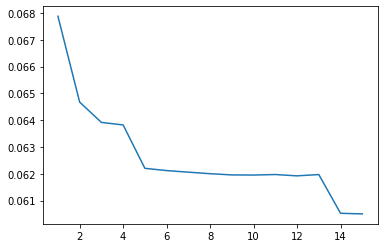

In [14]:
plt.plot(stats.groupby('epoch').mean().val_loss)

In [34]:
predictions.shape

(4368, 60, 6)

In [35]:
predictions.mean((0,1))

array([0.26533565, 0.14922237, 0.21536556, 0.21641548, 0.21140262,
       0.19743267], dtype=float32)

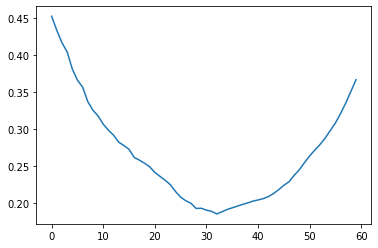

In [36]:
plt.plot(predictions.mean(0)[:,0])

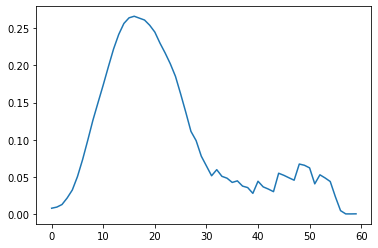

In [37]:
dd = train_md.loc[train_md.fold5==4].copy()
dd['res'] = val_results[:,0]

plt.plot(dd[['res','pos_idx']].groupby('pos_idx').mean().values)